<a href="https://colab.research.google.com/github/lev925/ECG/blob/main/ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Signal
1     -0.443851
2     -0.440725
3     -0.434636
4     -0.426514
5     -0.416419
...         ...
64532  2.066135
64533  1.889321
64534  1.721500
64535  1.562662
64536  1.411797

[64536 rows x 1 columns]


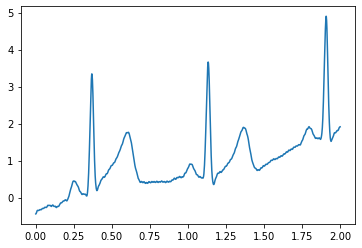

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
df= pd.read_csv('https://raw.githubusercontent.com/lev925/ECG/main/ecg.csv',header=None,names=["Signal"])
ndf=pd.read_csv('https://raw.githubusercontent.com/lev925/ECG/main/OrigEcg.csv',header=None,names=["Signal"])
dis=df["Signal"][0]
df["Signal"]=df["Signal"][1::1]
df = df[df['Signal'].notna()]
ndf["Signal"]=ndf["Signal"][1::1]
ndf = ndf[ndf['Signal'].notna()]
x=[i*dis for i in range(len(df))]
col=2000
single=df["Signal"][0:775]
plt.plot(x[0:col],df["Signal"][0:col])
print(df)

64036


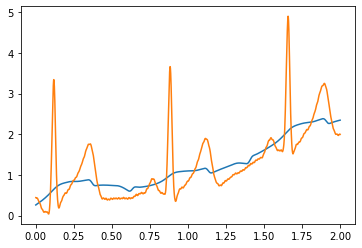

In [273]:
N=500
def moving_average(x, w):
  avg=[]
  it=0
  while it+w<len(x):
    avg.append(x[it:it+w].sum()/w)
    it+=1
  return avg
ma=moving_average(np.array(df["Signal"]),N)

print(len(ma))
plt.plot(x[0:col],ma[0:col])
plt.plot(x[0:col],df["Signal"][N//2:col+N//2])

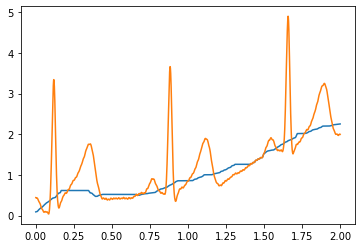

In [274]:
def moving_med(x, w):
  armed=[]
  index=w//2
  it=0
  while it+w<len(x):
    if w%2:
      armed.append(sorted(x[it:it+w])[index])
    else:
      armed.append(sum(sorted(x[it:it+w])[index-1:index+1])/2)
    it+=1
  return armed
mm=moving_med(np.array(df["Signal"]),N)
plt.plot(x[0:col],mm[0:col])
plt.plot(x[0:col],df["Signal"][N//2:col+N//2])

In [275]:
df['Signal'] = df['Signal'][N//2:len(df)-N//2]
df=df.dropna()
ndf['Signal'] = ndf['Signal'][N//2:len(ndf)-N//2]
ndf=ndf.dropna()
x=[i*dis for i in range(len(df))]
print(len(x),len(df))

64036 64036


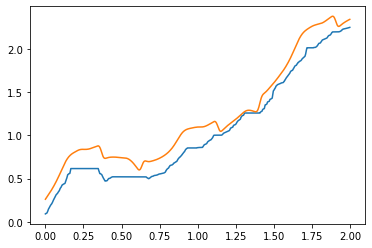

In [276]:
plt.plot(x[0:col],mm[0:col])
plt.plot(x[0:col],ma[0:col])

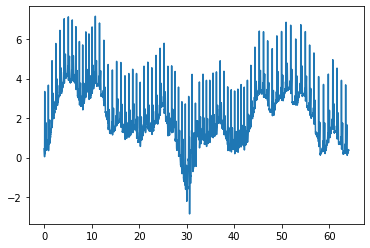

In [277]:
plt.plot(x,df["Signal"])

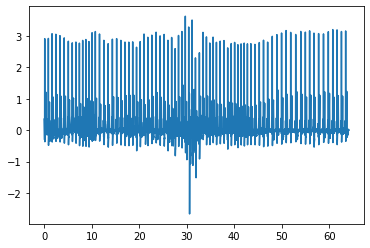

In [278]:
plt.plot(x[0:len(mm)],df["Signal"][0:len(mm)]-mm)

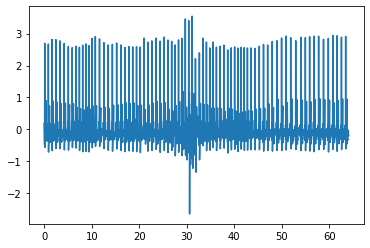

In [279]:
plt.plot(x[0:len(ma)],df["Signal"][0:len(ma)]-ma)

In [280]:
ma=df["Signal"]-ma
mm=df["Signal"]-mm

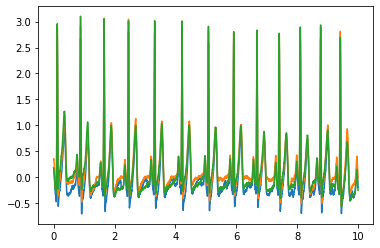

In [281]:
srez=10000


plt.plot(x[0:srez],ma[0:srez])
plt.plot(x[0:srez],mm[0:srez])
plt.plot(x[0:srez],ndf["Signal"][0:srez])

In [282]:
#df=df.reset_index()

In [283]:
def pogresh(d,y):
  if (len(d)!=len(y)):
    return "error"
  else:
    sum=0
    for i in range(N//2+1,len(d)-N//2+1):
      sum+=(d[i]-y[i])**2
    sum=sum/len(d)
    return sqrt(sum)
print(pogresh(ndf["Signal"][0:len(mm)],mm))
print(pogresh(df["Signal"][0:len(mm)],mm))


0.16805612796098068
2.264663732898291


In [284]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms1 =mean_squared_error(ndf["Signal"][0:len(mm)],mm)
rms2 =mean_squared_error(ndf["Signal"][0:len(ma)],ma)
print(rms1,rms2)

0.028342572813937598 0.041847748548194064


In [285]:
from scipy import interpolate
print(df)
#mm=pd.Series(data=mm)
#df["Signal"]=df["Signal"][150:len(mm)+150]-mm
def f(z):
    tck = interpolate.splrep(x,df["Signal"])
    return interpolate.splev(z, tck)
print(df["Signal"][150:len(mm)+150]-mm)


         Signal
251    0.441332
252    0.440119
253    0.438878
254    0.433637
255    0.432416
...         ...
64282  0.368780
64283  0.373179
64284  0.382624
64285  0.392114
64286  0.396608

[64036 rows x 1 columns]
251           NaN
252           NaN
253           NaN
254           NaN
255           NaN
           ...   
64282    0.378352
64283    0.379614
64284    0.380030
64285    0.380289
64286    0.380920
Name: Signal, Length: 64036, dtype: float64
